<a href="https://colab.research.google.com/github/MariaGodoi/cn1t2/blob/main/quest_o_5_fisqui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

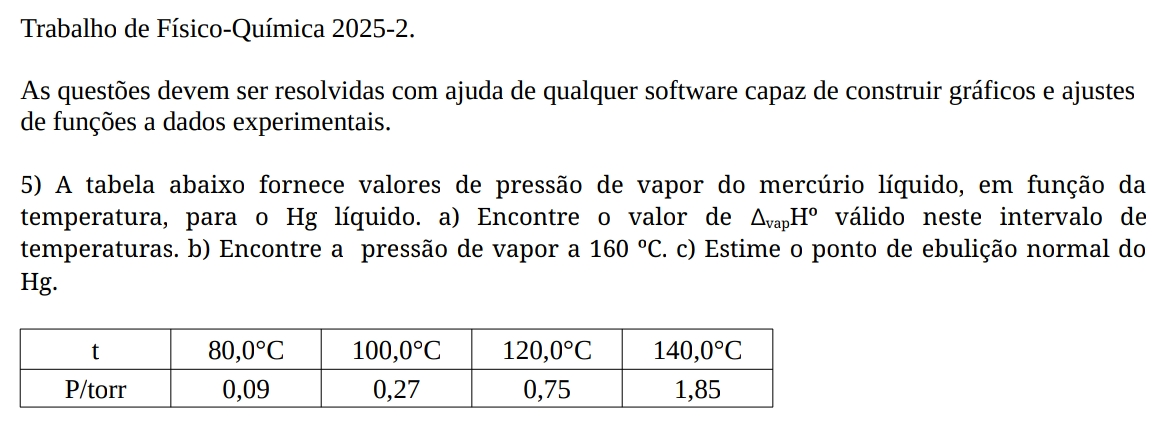

QUESTÃO 5 - PRESSÃO DE VAPOR DO MERCÚRIO

DADOS EXPERIMENTAIS:
T (°C)   | P (torr)
--------------------
  80.0  |     0.09
 100.0  |     0.27
 120.0  |     0.75
 140.0  |     1.85

RESULTADOS DO AJUSTE
Equação ajustada: ln(P/atm) = -7364.40 * (1/T) + 11.81
Coeficiente de determinação R² = 0.999955
ΔHvap = 61.23 ± 0.29 kJ/mol

b) PRESSÃO DE VAPOR A 160°C
   ln(P) = -5.1962
   P = 4.208 torr

c) PONTO DE EBULIÇÃO NORMAL (extrapolado!)
   T = 623.80 K  →  350.65 °C
   [Atenção: extrapolação, fora da faixa de dados experimentais]


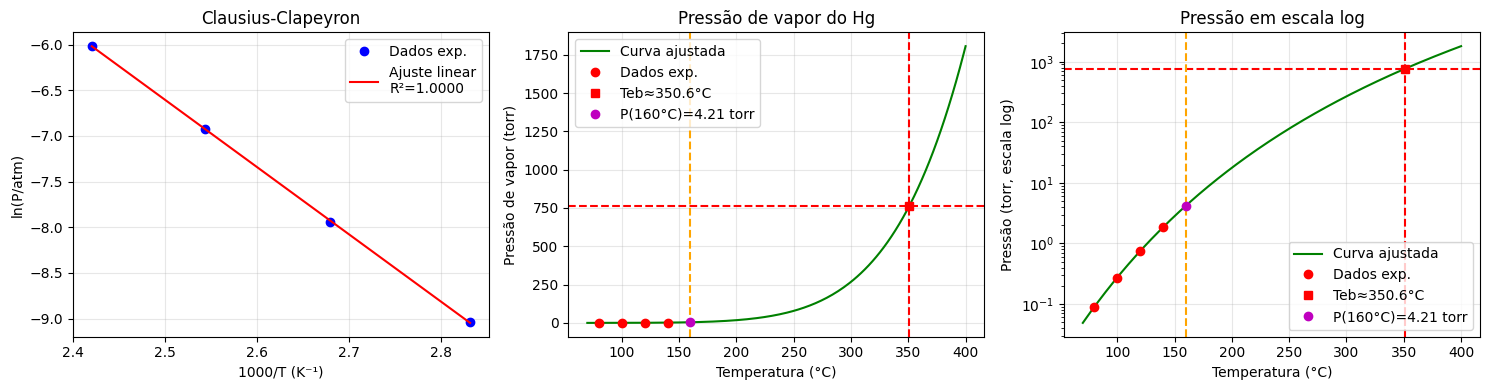


TABELA DE VERIFICAÇÃO DETALHADA:
T (°C) | T (K)  | 1/T (10⁻³ K⁻¹) | P_exp (torr) | ln(P/atm)
-----------------------------------------------------------------
  80.0 | 353.15 |    2.832     |        0.09 |    -9.0413
 100.0 | 373.15 |    2.680     |        0.27 |    -7.9427
 120.0 | 393.15 |    2.544     |        0.75 |    -6.9210
 140.0 | 413.15 |    2.420     |        1.85 |    -6.0181

RESUMO FINAL
a) ΔHvap = 61.23 ± 0.29 kJ/mol
b) P(160°C) = 4.208 torr
c) Teb = 350.65 °C (extrapolado)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

print("=" * 70)
print("QUESTÃO 5 - PRESSÃO DE VAPOR DO MERCÚRIO")
print("=" * 70)

# -------------------------------------------------------------------
# Dados experimentais
# -------------------------------------------------------------------
t_celsius = np.array([80.0, 100.0, 120.0, 140.0])  # °C
P_torr = np.array([0.09, 0.27, 0.75, 1.85])       # torr

print("\nDADOS EXPERIMENTAIS:")
print("T (°C)   | P (torr)")
print("-" * 20)
for i in range(len(t_celsius)):
    print(f"{t_celsius[i]:6.1f}  | {P_torr[i]:8.2f}")

# -------------------------------------------------------------------
# Conversões
# -------------------------------------------------------------------
T_K = t_celsius + 273.15       # K
P_atm = P_torr / 760           # atm
ln_P = np.log(P_atm)           # ln(P/atm)
inv_T = 1 / T_K                # 1/T (K⁻¹)

# -------------------------------------------------------------------
# Ajuste linear Clausius-Clapeyron
# ln(P) = slope * (1/T) + intercept
# slope = -ΔHvap / R
# -------------------------------------------------------------------
def linear_func(x, a, b):
    return a * x + b

params, cov = curve_fit(linear_func, inv_T, ln_P)
slope, intercept = params
slope_err, intercept_err = np.sqrt(np.diag(cov))

# R²
pred = linear_func(inv_T, slope, intercept)
ss_res = np.sum((ln_P - pred) ** 2)
ss_tot = np.sum((ln_P - np.mean(ln_P)) ** 2)
r_squared = 1 - ss_res/ss_tot

# -------------------------------------------------------------------
# ΔHvap com incerteza
# -------------------------------------------------------------------
R = 8.314  # J/mol.K
delta_H_vap = -slope * R
delta_H_vap_err = slope_err * R

print("\n" + "=" * 50)
print("RESULTADOS DO AJUSTE")
print("=" * 50)
print(f"Equação ajustada: ln(P/atm) = {slope:.2f} * (1/T) + {intercept:.2f}")
print(f"Coeficiente de determinação R² = {r_squared:.6f}")
print(f"ΔHvap = {delta_H_vap/1000:.2f} ± {delta_H_vap_err/1000:.2f} kJ/mol")

# -------------------------------------------------------------------
# b) Pressão de vapor a 160 °C
# -------------------------------------------------------------------
T_160 = 160 + 273.15
ln_P_160 = slope * (1/T_160) + intercept
P_160_atm = np.exp(ln_P_160)
P_160_torr = P_160_atm * 760

print("\nb) PRESSÃO DE VAPOR A 160°C")
print(f"   ln(P) = {ln_P_160:.4f}")
print(f"   P = {P_160_torr:.3f} torr")

# -------------------------------------------------------------------
# c) Ponto de ebulição normal (P = 1 atm = 760 torr)
# -------------------------------------------------------------------
P_eb_norm = 1.0
ln_P_eb = np.log(P_eb_norm)

if abs(intercept - ln_P_eb) < 1e-12:
    print("\nc) Não foi possível calcular Teb (intercepto ≈ ln(P)).")
    T_eb, t_eb = np.nan, np.nan
else:
    T_eb = slope / (ln_P_eb - intercept)  # K
    t_eb = T_eb - 273.15
    print("\nc) PONTO DE EBULIÇÃO NORMAL (extrapolado!)")
    print(f"   T = {T_eb:.2f} K  →  {t_eb:.2f} °C")
    print("   [Atenção: extrapolação, fora da faixa de dados experimentais]")

# -------------------------------------------------------------------
# Gráficos
# -------------------------------------------------------------------
plt.figure(figsize=(15, 4))

# Gráfico 1: Clausius-Clapeyron
plt.subplot(1, 3, 1)
T_fit = np.linspace(inv_T.max(), inv_T.min(), 100)
ln_P_fit = linear_func(T_fit, slope, intercept)

plt.plot(inv_T*1000, ln_P, 'bo', label='Dados exp.')
plt.plot(T_fit*1000, ln_P_fit, 'r-', label=f'Ajuste linear\nR²={r_squared:.4f}')
plt.xlabel('1000/T (K⁻¹)')
plt.ylabel('ln(P/atm)')
plt.title('Clausius-Clapeyron')
plt.legend()
plt.grid(alpha=0.3)

# Gráfico 2: P vs T
plt.subplot(1, 3, 2)
T_range = np.linspace(70, 400, 200) + 273.15
ln_P_range = slope*(1/T_range) + intercept
P_range_torr = np.exp(ln_P_range)*760

plt.plot(T_range-273.15, P_range_torr, 'g-', label='Curva ajustada')
plt.plot(t_celsius, P_torr, 'ro', label='Dados exp.')

plt.axhline(760, color='red', linestyle='--')
plt.axvline(t_eb, color='red', linestyle='--')
plt.plot(t_eb, 760, 'rs', label=f"Teb≈{t_eb:.1f}°C")

plt.axvline(160, color='orange', linestyle='--')
plt.plot(160, P_160_torr, 'mo', label=f"P(160°C)={P_160_torr:.2f} torr")

plt.xlabel('Temperatura (°C)')
plt.ylabel('Pressão de vapor (torr)')
plt.title('Pressão de vapor do Hg')
plt.legend()
plt.grid(alpha=0.3)

# Gráfico 3: Escala log
plt.subplot(1, 3, 3)
plt.semilogy(T_range-273.15, P_range_torr, 'g-', label='Curva ajustada')
plt.semilogy(t_celsius, P_torr, 'ro', label='Dados exp.')

plt.axhline(760, color='red', linestyle='--')
plt.axvline(t_eb, color='red', linestyle='--')
plt.semilogy(t_eb, 760, 'rs', label=f"Teb≈{t_eb:.1f}°C")

plt.axvline(160, color='orange', linestyle='--')
plt.semilogy(160, P_160_torr, 'mo', label=f"P(160°C)={P_160_torr:.2f} torr")

plt.xlabel('Temperatura (°C)')
plt.ylabel('Pressão (torr, escala log)')
plt.title('Pressão em escala log')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# Tabela final
# -------------------------------------------------------------------
print("\nTABELA DE VERIFICAÇÃO DETALHADA:")
print("T (°C) | T (K)  | 1/T (10⁻³ K⁻¹) | P_exp (torr) | ln(P/atm)")
print("-"*65)
for i in range(len(t_celsius)):
    print(f"{t_celsius[i]:6.1f} | {T_K[i]:6.2f} | {1000*inv_T[i]:8.3f}     | {P_torr[i]:11.2f} | {ln_P[i]:10.4f}")

print("\n" + "="*70)
print("RESUMO FINAL")
print("="*70)
print(f"a) ΔHvap = {delta_H_vap/1000:.2f} ± {delta_H_vap_err/1000:.2f} kJ/mol")
print(f"b) P(160°C) = {P_160_torr:.3f} torr")
print(f"c) Teb = {t_eb:.2f} °C (extrapolado)")
print("="*70)